In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)

# Define data directory
DATA_DIR = 'data/'

# Sports Data Analysis

This notebook provides a comprehensive investigation of the player and stint data.

## 1. Load the Data

In [5]:
# Load the datasets
player_data = pd.read_csv(DATA_DIR + 'player_data.csv')
stint_data = pd.read_csv(DATA_DIR + 'stint_data.csv')

print("Player data shape:", player_data.shape)
print("Stint data shape:", stint_data.shape)

Player data shape: (144, 23)
Stint data shape: (7448, 14)


### Preview Player Data

In [3]:
player_data.head(10)

,player,rating
0,USA_p1,3.0
1,USA_p2,3.0
2,USA_p3,3.5
3,USA_p4,0.0
4,USA_p5,2.0
5,USA_p6,0.5
6,USA_p7,1.5
7,USA_p8,2.5
8,USA_p9,1.0
9,USA_p10,1.0


### Preview Stint Data

In [4]:
stint_data.head(10)

,game_id,h_team,a_team,minutes,h_goals,a_goals,home1,home2,home3,home4,away1,away2,away3,away4
0,1,USA,Japan,4.252969,4,9,USA_p4,USA_p1,USA_p3,USA_p6,Japan_p12,Japan_p4,Japan_p8,Japan_p6
1,1,USA,Japan,5.688809,6,11,USA_p1,USA_p7,USA_p6,USA_p5,Japan_p7,Japan_p10,Japan_p8,Japan_p12
2,1,USA,Japan,1.149557,0,1,USA_p8,USA_p1,USA_p4,USA_p5,Japan_p5,Japan_p3,Japan_p7,Japan_p10
3,1,USA,Japan,3.511617,7,5,USA_p2,USA_p7,USA_p8,USA_p6,Japan_p2,Japan_p4,Japan_p10,Japan_p12
4,1,USA,Japan,2.163139,7,5,USA_p9,USA_p5,USA_p8,USA_p7,Japan_p8,Japan_p6,Japan_p10,Japan_p1
5,1,USA,Japan,2.155972,0,6,USA_p2,USA_p4,USA_p7,USA_p12,Japan_p1,Japan_p8,Japan_p11,Japan_p10
6,1,USA,Japan,1.496071,4,0,USA_p7,USA_p1,USA_p4,USA_p2,Japan_p5,Japan_p4,Japan_p3,Japan_p6
7,1,USA,Japan,4.248619,8,13,USA_p1,USA_p6,USA_p10,USA_p12,Japan_p10,Japan_p9,Japan_p12,Japan_p4
8,1,USA,Japan,1.945645,0,5,USA_p7,USA_p8,USA_p3,USA_p6,Japan_p8,Japan_p7,Japan_p12,Japan_p3
9,1,USA,Japan,3.335242,4,4,USA_p11,USA_p8,USA_p9,USA_p10,Japan_p3,Japan_p1,Japan_p5,Japan_p11


## 2. Basic Statistics

In [5]:
# Basic info about the dataframes
print("=== Player Data Info ===")
print(player_data.info())
print("\n=== Stint Data Info ===")
print(stint_data.info())

=== Player Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  144 non-null    object 
 1   rating  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB
None

=== Stint Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7448 entries, 0 to 7447
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   game_id  7448 non-null   int64  
 1   h_team   7448 non-null   object 
 2   a_team   7448 non-null   object 
 3   minutes  7448 non-null   float64
 4   h_goals  7448 non-null   int64  
 5   a_goals  7448 non-null   int64  
 6   home1    7448 non-null   object 
 7   home2    7448 non-null   object 
 8   home3    7448 non-null   object 
 9   home4    7448 non-null   object 
 10  away1    7448 non-null   object 
 11  away2    7448 non-null   object 
 1

In [6]:
# Descriptive statistics for player ratings
print("=== Player Rating Statistics ===")
player_data['rating'].describe()

=== Player Rating Statistics ===


count    144.000000
mean       1.979167
std        1.010219
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.500000
Name: rating, dtype: float64

In [7]:
# Descriptive statistics for stint data
print("=== Stint Data Statistics ===")
stint_data[['minutes', 'h_goals', 'a_goals']].describe()

=== Stint Data Statistics ===


,minutes,h_goals,a_goals
count,7448.000000,7448.000000,7448.000000
mean,2.843314,4.531955,4.293904
std,1.631194,3.581812,3.446256
min,0.001582,0.000000,0.000000
25%,1.622875,2.000000,2.000000
50%,2.582959,4.000000,4.000000
75%,3.765502,6.000000,6.000000
max,8.000000,29.000000,23.000000


## 3. Stint and Game Counts

In [8]:
# How many stints do we have data for?
num_stints = len(stint_data)
print(f"Total number of stints: {num_stints}")

Total number of stints: 7448


In [9]:
# How many games do we have data for?
num_games = stint_data['game_id'].nunique()
print(f"Total number of unique games: {num_games}")

Total number of unique games: 660


In [10]:
# Stints per game analysis
stints_per_game = stint_data.groupby('game_id').size()
print(f"Average stints per game: {stints_per_game.mean():.2f}")
print(f"Min stints in a game: {stints_per_game.min()}")
print(f"Max stints in a game: {stints_per_game.max()}")

Average stints per game: 11.28
Min stints in a game: 6
Max stints in a game: 16


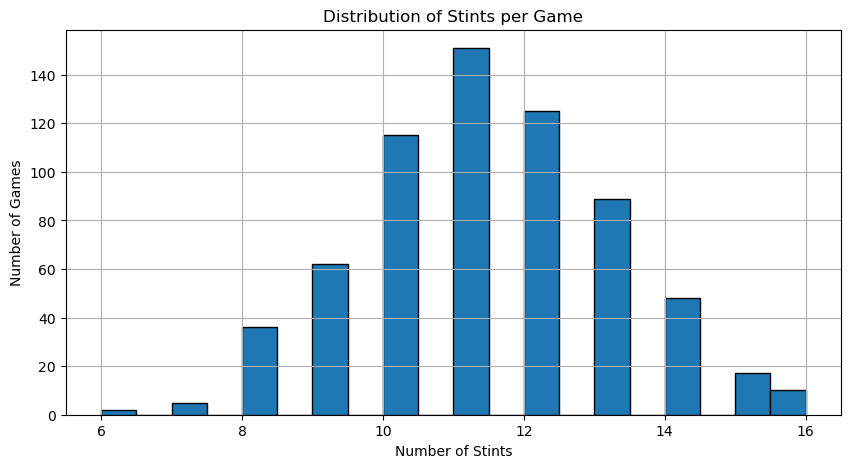

In [11]:
# Distribution of stints per game
plt.figure(figsize=(10, 5))
stints_per_game.hist(bins=20, edgecolor='black')
plt.xlabel('Number of Stints')
plt.ylabel('Number of Games')
plt.title('Distribution of Stints per Game')
plt.show()

## 4. Team Analysis - Wins and Losses

In [12]:
# Get all unique teams
all_teams = set(stint_data['h_team'].unique()) | set(stint_data['a_team'].unique())
print(f"Teams in the dataset: {sorted(all_teams)}")
print(f"Total number of teams: {len(all_teams)}")

Teams in the dataset: ['Argentina', 'Brazil', 'Canada', 'Chile', 'Columbia', 'Denmark', 'France', 'Great.Britain', 'Japan', 'Poland', 'Sweden', 'USA']
Total number of teams: 12


In [13]:
# Aggregate stint data to get game-level results
# Sum goals for each game
game_results = stint_data.groupby(['game_id', 'h_team', 'a_team']).agg({
    'h_goals': 'sum',
    'a_goals': 'sum',
    'minutes': 'sum'
}).reset_index()

game_results.rename(columns={
    'h_goals': 'home_total_goals',
    'a_goals': 'away_total_goals',
    'minutes': 'total_minutes'
}, inplace=True)

# Determine winner
game_results['home_win'] = game_results['home_total_goals'] > game_results['away_total_goals']
game_results['away_win'] = game_results['away_total_goals'] > game_results['home_total_goals']
game_results['draw'] = game_results['home_total_goals'] == game_results['away_total_goals']

print(f"Total games analyzed: {len(game_results)}")
game_results.head(10)

Total games analyzed: 660


,game_id,h_team,a_team,home_total_goals,away_total_goals,total_minutes,home_win,away_win,draw
0,1,USA,Japan,42,63,32.0,False,True,False
1,2,USA,Great.Britain,45,42,32.0,True,False,False
2,3,USA,Canada,60,28,32.0,True,False,False
3,4,USA,France,52,33,32.0,True,False,False
4,5,USA,Denmark,41,53,32.0,False,True,False
5,6,USA,Sweden,83,44,32.0,True,False,False
6,7,USA,Brazil,57,33,32.0,True,False,False
7,8,USA,Columbia,52,39,32.0,True,False,False
8,9,USA,Poland,49,39,32.0,True,False,False
9,10,USA,Argentina,64,32,32.0,True,False,False


In [14]:
# Calculate wins, losses, and draws for each team
team_stats = []

for team in all_teams:
    # Games where team was home
    home_games = game_results[game_results['h_team'] == team]
    home_wins = home_games['home_win'].sum()
    home_losses = home_games['away_win'].sum()
    home_draws = home_games['draw'].sum()
    home_goals_for = home_games['home_total_goals'].sum()
    home_goals_against = home_games['away_total_goals'].sum()
    
    # Games where team was away
    away_games = game_results[game_results['a_team'] == team]
    away_wins = away_games['away_win'].sum()
    away_losses = away_games['home_win'].sum()
    away_draws = away_games['draw'].sum()
    away_goals_for = away_games['away_total_goals'].sum()
    away_goals_against = away_games['home_total_goals'].sum()
    
    # Total stats
    total_games = len(home_games) + len(away_games)
    total_wins = home_wins + away_wins
    total_losses = home_losses + away_losses
    total_draws = home_draws + away_draws
    total_goals_for = home_goals_for + away_goals_for
    total_goals_against = home_goals_against + away_goals_against
    
    team_stats.append({
        'team': team,
        'games': total_games,
        'wins': total_wins,
        'losses': total_losses,
        'draws': total_draws,
        'goals_for': total_goals_for,
        'goals_against': total_goals_against,
        'goal_diff': total_goals_for - total_goals_against
    })

team_stats_df = pd.DataFrame(team_stats)
team_stats_df = team_stats_df.sort_values('wins', ascending=False)
team_stats_df

,team,games,wins,losses,draws,goals_for,goals_against,goal_diff
11,Japan,110,91,19,0,6181,4493,1688
8,USA,110,79,31,0,6098,4849,1249
3,France,110,70,40,0,5718,5139,579
7,Great.Britain,110,66,44,0,5744,5133,611
9,Canada,110,66,44,0,5677,5451,226
6,Poland,110,65,45,0,5403,5127,276
5,Brazil,110,63,47,0,5559,5339,220
10,Denmark,110,57,53,0,5800,5636,164
0,Columbia,110,55,55,0,5103,5079,24
1,Chile,110,23,87,0,5603,6867,-1264


In [15]:
# Team with the most wins
most_wins_team = team_stats_df.loc[team_stats_df['wins'].idxmax()]
print(f"Team with the most wins: {most_wins_team['team']}")
print(f"  - Wins: {int(most_wins_team['wins'])}")
print(f"  - Losses: {int(most_wins_team['losses'])}")
print(f"  - Draws: {int(most_wins_team['draws'])}")
print(f"  - Total Games: {int(most_wins_team['games'])}")

Team with the most wins: Japan
  - Wins: 91
  - Losses: 19
  - Draws: 0
  - Total Games: 110


In [16]:
# Team with the most losses
most_losses_team = team_stats_df.loc[team_stats_df['losses'].idxmax()]
print(f"Team with the most losses: {most_losses_team['team']}")
print(f"  - Wins: {int(most_losses_team['wins'])}")
print(f"  - Losses: {int(most_losses_team['losses'])}")
print(f"  - Draws: {int(most_losses_team['draws'])}")
print(f"  - Total Games: {int(most_losses_team['games'])}")

Team with the most losses: Sweden
  - Wins: 12
  - Losses: 98
  - Draws: 0
  - Total Games: 110


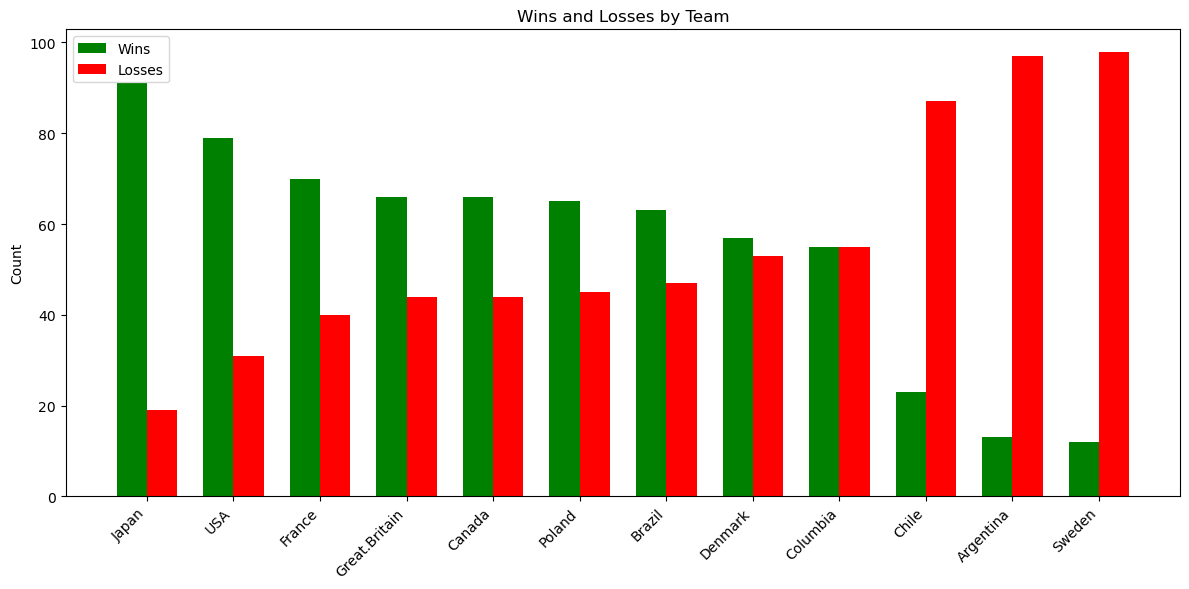

In [17]:
# Visualize team wins and losses
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(team_stats_df))
width = 0.35

bars1 = ax.bar(x - width/2, team_stats_df['wins'], width, label='Wins', color='green')
bars2 = ax.bar(x + width/2, team_stats_df['losses'], width, label='Losses', color='red')

ax.set_ylabel('Count')
ax.set_title('Wins and Losses by Team')
ax.set_xticks(x)
ax.set_xticklabels(team_stats_df['team'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

## 5. Player Analysis

In [18]:
# Total number of players
num_players = len(player_data)
print(f"Total number of players: {num_players}")

# Extract team from player name
player_data['team'] = player_data['player'].apply(lambda x: '_'.join(x.split('_')[:-1]))

# Players per team
players_per_team = player_data.groupby('team').size()
print(f"\nPlayers per team:")
print(players_per_team)

Total number of players: 144

Players per team:
team
Argentina        12
Brazil           12
Canada           12
Chile            12
Columbia         12
Denmark          12
France           12
Great.Britain    12
Japan            12
Poland           12
Sweden           12
USA              12
dtype: int64


In [19]:
# Player rating distribution by team
team_ratings = player_data.groupby('team')['rating'].agg(['mean', 'min', 'max', 'std'])
team_ratings = team_ratings.sort_values('mean', ascending=False)
print("Player Rating Statistics by Team:")
team_ratings

Player Rating Statistics by Team:


,mean,min,max,std
team,,,,
Sweden,2.291667,0.0,3.5,1.032612
Japan,2.125000,0.5,3.5,0.979912
Brazil,2.083333,0.5,3.5,1.104399
Great.Britain,2.083333,0.0,3.5,0.949482
Canada,2.041667,0.0,3.5,1.137348
Denmark,2.041667,0.5,3.5,0.964326
Poland,2.041667,0.5,3.0,0.964326
USA,2.041667,0.0,3.5,1.214652
France,1.916667,0.5,3.5,1.062444


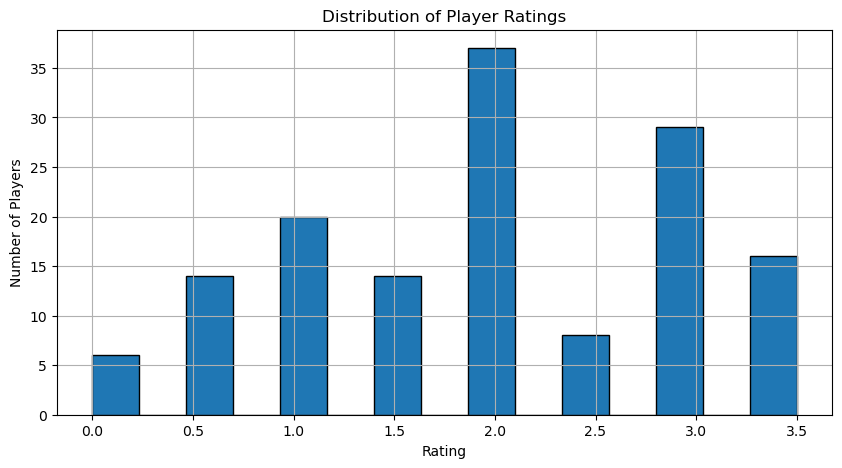

In [20]:
# Player rating distribution
plt.figure(figsize=(10, 5))
player_data['rating'].hist(bins=15, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Ratings')
plt.show()

/var/folders/sv/s0hpb47n1x315pn03yhk3qxc0000gn/T/ipykernel_50171/3101477658.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(team_groups, labels=teams_sorted)


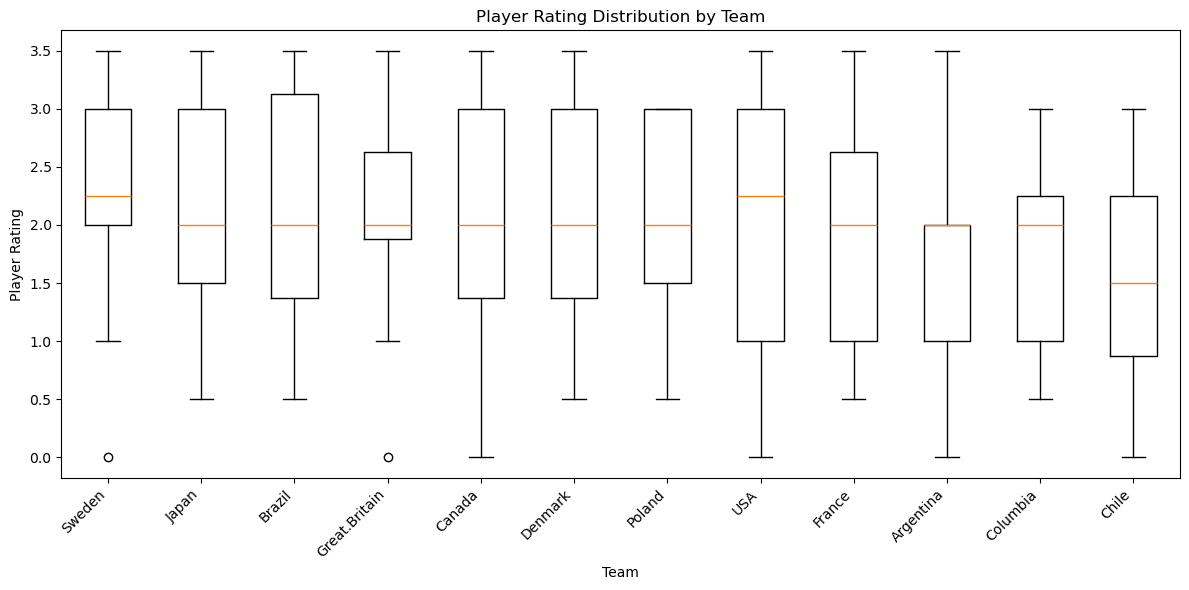

In [21]:
# Boxplot of player ratings by team
plt.figure(figsize=(12, 6))
teams_sorted = player_data.groupby('team')['rating'].mean().sort_values(ascending=False).index
player_data_sorted = player_data.set_index('team').loc[teams_sorted].reset_index()

# Create boxplot
team_groups = [player_data[player_data['team'] == team]['rating'].values for team in teams_sorted]
plt.boxplot(team_groups, labels=teams_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Team')
plt.ylabel('Player Rating')
plt.title('Player Rating Distribution by Team')
plt.tight_layout()
plt.show()

In [22]:
# Top 10 highest rated players
top_players = player_data.nlargest(10, 'rating')[['player', 'team', 'rating']]
print("Top 10 Highest Rated Players:")
top_players

Top 10 Highest Rated Players:


,player,team,rating
2,USA_p3,USA,3.5
10,USA_p11,USA,3.5
20,Japan_p9,Japan,3.5
22,Japan_p11,Japan,3.5
25,Great.Britain_p2,Great.Britain,3.5
40,Canada_p5,Canada,3.5
43,Canada_p8,Canada,3.5
49,France_p2,France,3.5
58,France_p11,France,3.5
67,Denmark_p8,Denmark,3.5


/var/folders/2q/rs0vm_f535l_c487ypht7t600000gp/T/ipykernel_16830/3924810323.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(runs_for_player_game)
/var/folders/2q/rs0vm_f535l_c487ypht7t600000gp/T/ipykernel_16830/3924810323.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


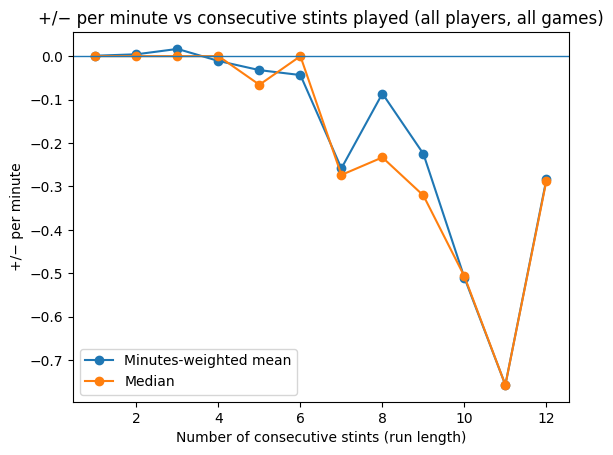

,run_len,mean_pm_per_min,median_pm_per_min,n_runs,total_minutes
0,1,0.000976,0.000000e+00,27605.0,77874.851698
1,2,0.004242,0.000000e+00,8652.0,49742.019352
2,3,0.016618,0.000000e+00,2718.0,23167.742597
3,4,-0.011052,0.000000e+00,935.0,10767.692768
4,5,-0.032210,-6.591578e-02,307.0,4408.504190
5,6,-0.043572,-1.709614e-17,120.0,2019.659455
6,7,-0.258464,-2.736608e-01,34.0,642.256558
7,8,-0.086149,-2.332647e-01,19.0,417.882958
8,9,-0.225033,-3.209782e-01,9.0,222.189760
9,10,-0.510035,-5.071002e-01,2.0,60.780143


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stints = pd.read_csv("/Users/matthewstebelsky/SportsModule/data/stint_data.csv")

HOME = ["home1","home2","home3","home4"]
AWAY = ["away1","away2","away3","away4"]

# stints are already in order -> create stint index within each game
stints["stint_idx"] = stints.groupby("game_id").cumcount() + 1

# --- expand to player appearances with pm/min (player's team perspective) ---
rows = []
for r in stints.itertuples(index=False):
    if r.minutes <= 0:
        continue

    pm_home = (r.h_goals - r.a_goals) / r.minutes
    pm_away = -pm_home

    for c in HOME:
        rows.append((getattr(r, c), r.game_id, r.stint_idx, r.minutes, pm_home))
    for c in AWAY:
        rows.append((getattr(r, c), r.game_id, r.stint_idx, r.minutes, pm_away))

player_pm = pd.DataFrame(rows, columns=["player","game_id","stint_idx","minutes","pm_per_min"])
player_pm = player_pm.sort_values(["player","game_id","stint_idx"]).reset_index(drop=True)

# --- collapse consecutive stints (runs) for each player within each game ---
def runs_for_player_game(g):
    g = g.sort_values("stint_idx").copy()
    new_run = g["stint_idx"].ne(g["stint_idx"].shift() + 1)
    g["run_id"] = new_run.cumsum()

    runs = (
        g.groupby("run_id", as_index=False)
         .agg(
             run_len=("stint_idx", lambda s: int(s.max() - s.min() + 1)),
             minutes=("minutes", "sum"),
             pm_per_min=("pm_per_min", lambda s: np.average(s, weights=g.loc[s.index, "minutes"]))
         )
    )
    return runs[["run_len","minutes","pm_per_min"]]

runs = (
    player_pm.groupby(["player","game_id"], group_keys=False)
             .apply(runs_for_player_game)
             .reset_index(drop=True)
)

# --- aggregate across ALL runs: y = avg +/- per minute, x = run length ---
trend = (
    runs.groupby("run_len")
        .apply(lambda g: pd.Series({
            "mean_pm_per_min": np.average(g["pm_per_min"], weights=g["minutes"]),
            "median_pm_per_min": g["pm_per_min"].median(),
            "n_runs": len(g),
            "total_minutes": g["minutes"].sum(),
        }))
        .reset_index()
        .sort_values("run_len")
)

# --- visualize ---
plt.figure()
plt.plot(trend["run_len"], trend["mean_pm_per_min"], marker="o", label="Minutes-weighted mean")
plt.plot(trend["run_len"], trend["median_pm_per_min"], marker="o", label="Median")
plt.axhline(0, linewidth=1)
plt.title("+/− per minute vs consecutive stints played (all players, all games)")
plt.xlabel("Number of consecutive stints (run length)")
plt.ylabel("+/− per minute")
plt.legend()
plt.show()

trend

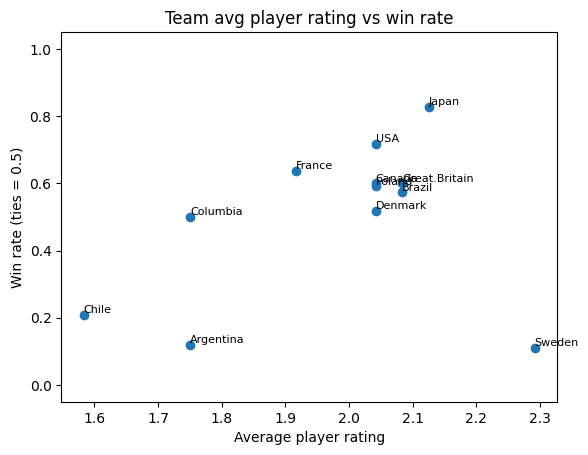

,team,avg_player_rating,games,wins,ties,win_rate
8,Japan,2.125000,110,91,0,0.827273
11,USA,2.041667,110,79,0,0.718182
6,France,1.916667,110,70,0,0.636364
2,Canada,2.041667,110,66,0,0.600000
7,Great.Britain,2.083333,110,66,0,0.600000
9,Poland,2.041667,110,65,0,0.590909
1,Brazil,2.083333,110,63,0,0.572727
5,Denmark,2.041667,110,57,0,0.518182
4,Columbia,1.750000,110,55,0,0.500000
3,Chile,1.583333,110,23,0,0.209091


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

players = pd.read_csv("/Users/matthewstebelsky/SportsModule/data/player_data.csv")

# --- get team for each player (use column if it exists, else parse from "Canada_p3" style names) ---
if "team" not in players.columns:
    players["team"] = players["player"].apply(lambda s: "_".join(str(s).split("_")[:-1]))

team_rating = (
    players.groupby("team", as_index=False)["rating"]
    .mean()
    .rename(columns={"rating": "avg_player_rating"})
)

# --- compute final score per game by summing stints ---
games = (
    stints.groupby(["game_id", "h_team", "a_team"], as_index=False)[["h_goals", "a_goals"]]
    .sum()
    .rename(columns={"h_goals": "h_final", "a_goals": "a_final"})
)

# --- convert to team-level game results (win/tie/loss) ---
home = games[["game_id", "h_team", "h_final", "a_final"]].copy()
home["team"] = home["h_team"]
home["is_win"] = (home["h_final"] > home["a_final"]).astype(int)
home["is_tie"] = (home["h_final"] == home["a_final"]).astype(int)

away = games[["game_id", "a_team", "a_final", "h_final"]].copy()
away["team"] = away["a_team"]
away["is_win"] = (away["a_final"] > away["h_final"]).astype(int)
away["is_tie"] = (away["a_final"] == away["h_final"]).astype(int)

results = pd.concat(
    [home[["game_id", "team", "is_win", "is_tie"]], away[["game_id", "team", "is_win", "is_tie"]]],
    ignore_index=True,
)

team_winrate = (
    results.groupby("team", as_index=False)
    .agg(games=("game_id", "nunique"), wins=("is_win", "sum"), ties=("is_tie", "sum"))
)
team_winrate["win_rate"] = (team_winrate["wins"] + 0.5 * team_winrate["ties"]) / team_winrate["games"]

# --- merge + plot ---
team_summary = team_rating.merge(team_winrate, on="team", how="inner")

plt.figure()
plt.scatter(team_summary["avg_player_rating"], team_summary["win_rate"])
for _, r in team_summary.iterrows():
    plt.text(r["avg_player_rating"], r["win_rate"], r["team"], fontsize=8, ha="left", va="bottom")
plt.title("Team avg player rating vs win rate")
plt.xlabel("Average player rating")
plt.ylabel("Win rate (ties = 0.5)")
plt.ylim(-0.05, 1.05)
plt.show()

team_summary.sort_values("win_rate", ascending=False)

/var/folders/2q/rs0vm_f535l_c487ypht7t600000gp/T/ipykernel_16830/3086758896.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=group_labels, showfliers=False)


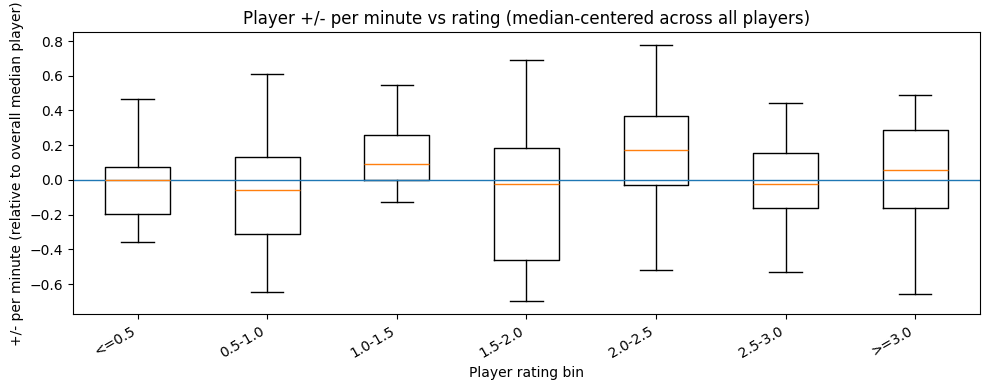

In [17]:
HOME = ["home1","home2","home3","home4"]
AWAY = ["away1","away2","away3","away4"]

rating_map = dict(zip(players["player"], players["rating"]))

# --- build per-player totals: minutes + plus_minus ---
rows = []
for r in stints.itertuples(index=False):
    if r.minutes <= 0:
        continue

    pm_home = (r.h_goals - r.a_goals)   # total +/- for that stint
    pm_away = -pm_home

    for c in HOME:
        rows.append((getattr(r, c), r.minutes, pm_home))
    for c in AWAY:
        rows.append((getattr(r, c), r.minutes, pm_away))

player_totals = pd.DataFrame(rows, columns=["player", "minutes", "plus_minus"]) \
    .groupby("player", as_index=False) \
    .agg(total_minutes=("minutes","sum"), total_plus_minus=("plus_minus","sum"))

player_totals["pm_per_min"] = player_totals["total_plus_minus"] / player_totals["total_minutes"]
player_totals["rating"] = player_totals["player"].map(rating_map)

# --- median-center so overall median is 0 ---
overall_median = player_totals["pm_per_min"].median()
player_totals["pm_per_min_centered"] = player_totals["pm_per_min"] - overall_median

# --- bin ratings for readable boxplots (edit bins if you want) ---
bins = [-np.inf, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, np.inf]
labels = ["<=0.5","0.5-1.0","1.0-1.5","1.5-2.0","2.0-2.5","2.5-3.0",">=3.0"]
player_totals["rating_bin"] = pd.cut(player_totals["rating"], bins=bins, labels=labels, include_lowest=True)

# --- boxplot data per bin ---
groups, group_labels = [], []
for lab in labels:
    vals = player_totals.loc[player_totals["rating_bin"] == lab, "pm_per_min_centered"].dropna().values
    if len(vals) > 0:
        groups.append(vals)
        group_labels.append(lab)

plt.figure(figsize=(10, 4))
plt.boxplot(groups, labels=group_labels, showfliers=False)
plt.axhline(0, linewidth=1)
plt.title("Player +/- per minute vs rating (median-centered across all players)")
plt.xlabel("Player rating bin")
plt.ylabel("+/- per minute (relative to overall median player)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

/var/folders/2q/rs0vm_f535l_c487ypht7t600000gp/T/ipykernel_16830/2139326950.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


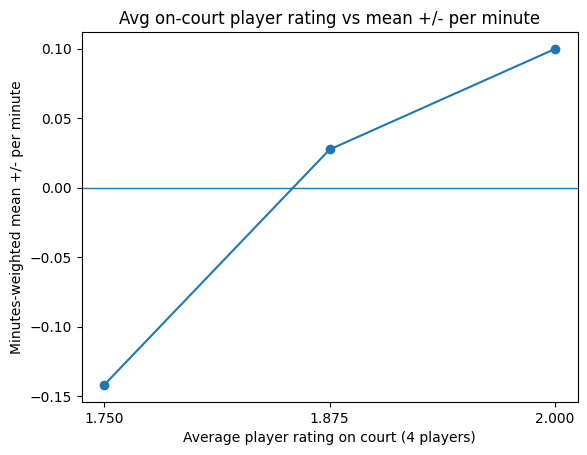

,avg_rating_on_court,n_stints,total_minutes,mean_pm_per_min
0,1.750,4772.0,13552.838044,-0.141889
1,1.875,4619.0,13166.292818,0.027494
2,2.000,5505.0,15634.869138,0.099841


In [19]:
HOME = ["home1","home2","home3","home4"]
AWAY = ["away1","away2","away3","away4"]

rating = dict(zip(players["player"], players["rating"]))

# --- build team-stint rows: avg rating on court vs +/- per minute ---
rows = []
for r in stints.itertuples(index=False):
    if r.minutes <= 0:
        continue

    home_players = [getattr(r, c) for c in HOME]
    away_players = [getattr(r, c) for c in AWAY]

    home_avg_rating = np.mean([rating.get(p, np.nan) for p in home_players])
    away_avg_rating = np.mean([rating.get(p, np.nan) for p in away_players])

    pm_home_per_min = (r.h_goals - r.a_goals) / r.minutes
    pm_away_per_min = -pm_home_per_min

    rows.append((home_avg_rating, pm_home_per_min, r.minutes))
    rows.append((away_avg_rating, pm_away_per_min, r.minutes))

df = pd.DataFrame(rows, columns=["avg_rating_on_court", "pm_per_min", "minutes"]).dropna()

# --- minutes-weighted mean pm/min per avg_rating value ---
summary = (
    df.groupby("avg_rating_on_court")
      .apply(lambda g: pd.Series({
          "n_stints": len(g),
          "total_minutes": g["minutes"].sum(),
          "mean_pm_per_min": (g["pm_per_min"] * g["minutes"]).sum() / g["minutes"].sum()
      }))
      .reset_index()
      .sort_values("avg_rating_on_court")
)

plt.figure()
plt.plot(summary["avg_rating_on_court"], summary["mean_pm_per_min"], marker="o")
plt.axhline(0, linewidth=1)
plt.title("Avg on-court player rating vs mean +/- per minute")
plt.xlabel("Average player rating on court (4 players)")
plt.ylabel("Minutes-weighted mean +/- per minute")
plt.xticks(summary["avg_rating_on_court"].unique())
plt.show()

summary

## 6. Summary

In [23]:
# Print summary statistics
print("=" * 50)
print("DATA INVESTIGATION SUMMARY")
print("=" * 50)
print(f"\n📊 Dataset Overview:")
print(f"   - Total stints: {num_stints}")
print(f"   - Total unique games: {num_games}")
print(f"   - Total players: {num_players}")
print(f"   - Total teams: {len(all_teams)}")

print(f"\n🏆 Team Performance:")
print(f"   - Team with most wins: {most_wins_team['team']} ({int(most_wins_team['wins'])} wins)")
print(f"   - Team with most losses: {most_losses_team['team']} ({int(most_losses_team['losses'])} losses)")

best_goal_diff_team = team_stats_df.loc[team_stats_df['goal_diff'].idxmax()]
print(f"   - Best goal difference: {best_goal_diff_team['team']} (+{int(best_goal_diff_team['goal_diff'])})")

print(f"\n⭐ Player Ratings:")
print(f"   - Average player rating: {player_data['rating'].mean():.2f}")
print(f"   - Highest rated player: {player_data.loc[player_data['rating'].idxmax(), 'player']} ({player_data['rating'].max()})")
print(f"   - Lowest rated player: {player_data.loc[player_data['rating'].idxmin(), 'player']} ({player_data['rating'].min()})")

print(f"\n⏱️ Game Duration:")
print(f"   - Average total game time: {game_results['total_minutes'].mean():.2f} minutes")
print(f"   - Average stint duration: {stint_data['minutes'].mean():.2f} minutes")

DATA INVESTIGATION SUMMARY

📊 Dataset Overview:
   - Total stints: 7448
   - Total unique games: 660
   - Total players: 144
   - Total teams: 12

🏆 Team Performance:
   - Team with most wins: Japan (91 wins)
   - Team with most losses: Sweden (98 losses)
   - Best goal difference: Japan (+1688)

⭐ Player Ratings:
   - Average player rating: 1.98
   - Highest rated player: USA_p3 (3.5)
   - Lowest rated player: USA_p4 (0.0)

⏱️ Game Duration:
   - Average total game time: 32.09 minutes
   - Average stint duration: 2.84 minutes
